# Read the DCIM to one folder 

In [2]:
import os
import shutil

# Define locations
main_folder = 'Prostate Fused-MRI-Pathology'
output_folder = 'dcm_files'

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

for patient_id in os.listdir(main_folder):
    patient_path = os.path.join(main_folder, patient_id)
    if os.path.isdir(patient_path):
        for study_folder in os.listdir(patient_path):
            study_path = os.path.join(patient_path, study_folder)
            if os.path.isdir(study_path):
                # Recursively walk all subfolders within the study_folder
                for root, dirs, files in os.walk(study_path):
                    for file in files:
                        if file.lower().endswith('.dcm'):
                            dcm_path = os.path.join(root, file)
                            # Get subfolder path(s) under study_folder
                            rel_path = os.path.relpath(root, study_path)
                            rel_path_clean = rel_path.replace(os.sep, '_')
                            new_filename = (
                                f"{patient_id}__{study_folder}"
                                f"{'__' + rel_path_clean if rel_path_clean != '.' else ''}"
                                f"__{file}"
                            )
                            target_path = os.path.join(output_folder, new_filename)
                            shutil.copy2(dcm_path, target_path)

print("Finished copying all DCM files.")


Finished copying all DCM files.


In [1]:
import os
import pydicom
import numpy as np
from PIL import Image

# Input and output directories
dcm_folder = 'dcm_files'
img_folder = 'Images'
os.makedirs(img_folder, exist_ok=True)

# Helper function to normalize pixel array to 0-255
def normalize_to_uint8(arr):
    arr = arr.astype(np.float32)
    arr -= arr.min()
    arr /= (arr.max() + 1e-8)
    arr *= 255.0
    return arr.astype(np.uint8)

# Convert all DICOM files to PNG images
for filename in os.listdir(dcm_folder):
    if filename.lower().endswith('.dcm'):
        dcm_path = os.path.join(dcm_folder, filename)
        try:
            ds = pydicom.dcmread(dcm_path)
            img_array = ds.pixel_array
            img_uint8 = normalize_to_uint8(img_array)
            img = Image.fromarray(img_uint8)
            # Save as PNG with same base name
            out_path = os.path.join(img_folder, filename.replace('.dcm', '.png'))
            img.save(out_path)
        except Exception as e:
            print(f'Failed to convert {filename}: {e}')

print('✅ All DICOM files converted to PNG images in dcm_images.')

✅ All DICOM files converted to PNG images in dcm_images.


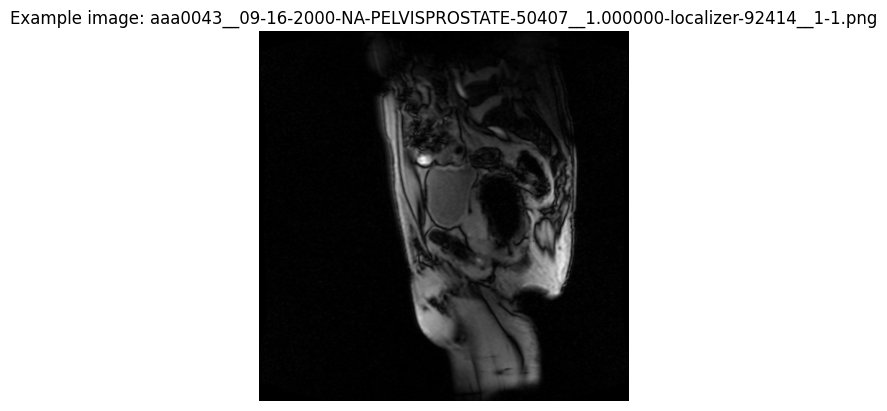

In [4]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Pick one image from the dcm_images folder
img_folder = 'Images'
img_files = [f for f in os.listdir(img_folder) if f.lower().endswith('.png')]
if img_files:
    img_path = os.path.join(img_folder, img_files[0])
    img = Image.open(img_path)
    plt.imshow(img, cmap='gray')
    plt.title(f'Example image: {img_files[0]}')
    plt.axis('off')
    plt.show()
else:
    print('No PNG images found in dcm_images.')